## **Условие задания**

Вы - сотрудник отдела аналитики крупной компании.

Ваша компания занимается продвижением товаров и услуг в соцсетях: ВКонтакте, Facebook, Instagram и TikTok.

Руководитель отдела в курсе, что Вы знаете стандартный язык Python и доверил Вам анализ группы в соцсети.
Это одна из групп, которую вскоре планируется задействовать для продвижения нового товара.

Руководитель просит предоставить наглядный отчет в Jupyter Notebook с графиками.

Детали отчета остаются на Ваше усмотрение.

Задачи, которые сформулировал руководитель:

1) определить статистику посещаемости группы (просмотры/посещения в год); 

2) провести анализ охвата аудитории (reach/reach_subscribers);

3) провести анализ демографии (пол - gender, возраст аудитории - age, gender_age, страна - countries);

4) провести анализ обратной связи.

5) обосновать, подходит ли данная группа для продвижения нового товара среди активных пользователей из России моложе 30 лет?

До старта рекламной кампании остается совсем немного времни. 

**ВНИМАНИЕ**: про данные статистики ВК [тут](https://vk.com/dev/objects/stats_format), про виральный охватат [тут](https://vk.com/@adminsclub-viral-reach)

## **Данные**

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
df.head()

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,15.03.2020,views,NaN,NaN,4
1,15.03.2020,visitors,NaN,NaN,3
2,15.03.2020,gender,М,NaN,3
3,15.03.2020,age,24-27,NaN,1
4,15.03.2020,age,30-35,NaN,2


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
dfs = pd.get_dummies(df, columns=['Критерий'])

In [8]:
dfs

,Дата,Парам. №1,Парам. №2,Значение,Критерий_activity,Критерий_age,Критерий_cities,Критерий_countries,Критерий_feedback,Критерий_gender,Критерий_gender_age,Критерий_members,Критерий_reach,Критерий_reach_subscribers,Критерий_reach_viral,Критерий_sections,Критерий_views,Критерий_visitors
0,15.03.2020,NaN,NaN,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15.03.2020,NaN,NaN,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15.03.2020,М,NaN,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,15.03.2020,24-27,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,15.03.2020,30-35,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46407,02.08.2016,NaN,NaN,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0
46408,02.08.2016,NaN,NaN,109,0,0,0,0,0,0,0,0,0,0,1,0,0,0
46409,01.08.2016,NaN,NaN,203,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46410,01.08.2016,NaN,NaN,28,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
view = dfs[['Дата', 'Значение']][dfСriterion['Критерий_views'] == 1]

In [21]:
def convert(row):
  return datetime.strptime(row['Дата'], '%d.%m.%Y')

In [22]:
view['Дата'] = view.apply(convert, axis=1)
view.head()

,Дата,Значение
0,2020-03-15,4
10,2020-03-14,14
32,2020-03-13,16
51,2020-03-12,17
73,2020-03-11,13


In [23]:
view['Дата'] = view['Дата'].dt.strftime('%Y')

In [24]:
ser = view.groupby(['Дата'])['Значение'].sum() 

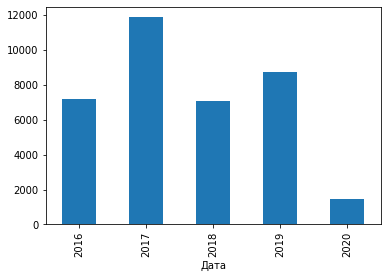

In [39]:
ser.plot.bar()
plt.show()

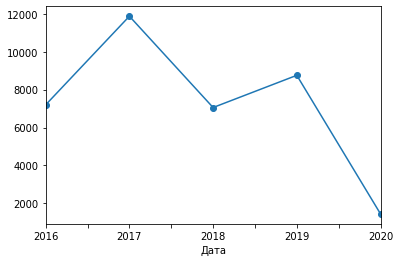

In [36]:
ser.plot(marker='o')
plt.show()

In [31]:
reach = dfs[['Дата','Значение']][dfs['Критерий_reach'] == 1]

In [32]:
reach['Дата'] = reach.apply(convert, axis=1)
reach.head()

,Дата,Значение
42453,2020-03-15,6
42456,2020-03-14,16
42459,2020-03-13,12
42462,2020-03-12,16
42465,2020-03-11,17


In [33]:
reach['Дата'] = reach['Дата'].dt.strftime('%Y-%m') 
reach.head()

,Дата,Значение
42453,2020-03,6
42456,2020-03,16
42459,2020-03,12
42462,2020-03,16
42465,2020-03,17


In [34]:
month = reach.groupby(['Дата'])['Значение'].sum()

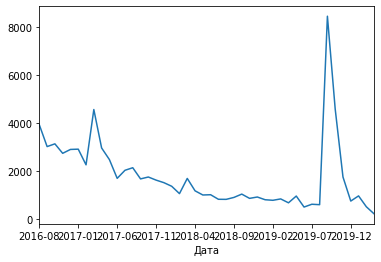

In [40]:
month.plot()
plt.show()

In [41]:
subs = dfs[['Дата','Значение']][dfs['Критерий_reach_subscribers'] == 1]

In [42]:
subs['Дата'] = subs.apply(convert, axis=1)
subs.head()

,Дата,Значение
42454,2020-03-15,3
42457,2020-03-14,5
42460,2020-03-13,3
42463,2020-03-12,4
42466,2020-03-11,3


In [43]:
subs['Дата'] = subs['Дата'].dt.strftime('%Y-%m')
subs.head()

,Дата,Значение
42454,2020-03,3
42457,2020-03,5
42460,2020-03,3
42463,2020-03,4
42466,2020-03,3


In [44]:
subsMonth = subs.groupby(['Дата'])['Значение'].sum()

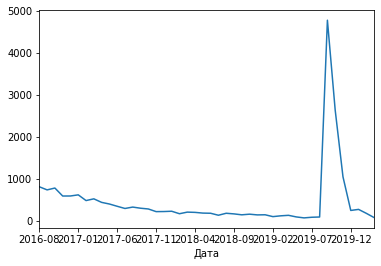

In [45]:
subsMonth.plot()
plt.show()

In [46]:
gender = dfs[['Дата', 'Значение','Парам. №1']][dfs['Критерий_gender'] == 1]
gender.head()

,Дата,Значение,Парам. №1
2,15.03.2020,3,М
12,14.03.2020,1,Ж
13,14.03.2020,8,М
34,13.03.2020,1,Ж
35,13.03.2020,5,М


In [47]:
gs = gender.groupby(['Парам. №1'])['Значение'].sum()
gs

Парам. №1
Ж    10063
М    12637
Name: Значение, dtype: int64

In [48]:
allGenders = 10063 + 12637
mGender = 'Мужчины: ' + str(round(12637 * 100 / allGenders)) + '%'
gGender = 'Женщины: ' + str(round(10063 * 100 / allGenders)) + '%'

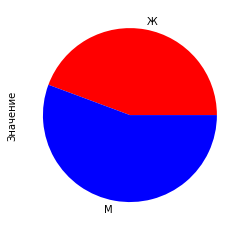

In [49]:
gs.plot.pie(colors = ('r','b'))
plt.show()

In [50]:
age = dfs[['Парам. №1', 'Значение']][dfs['Критерий_age'] == 1]
age.head()

,Парам. №1,Значение
3,24-27,1
4,30-35,2
14,24-27,1
15,27-30,4
16,30-35,1


In [51]:
agess = age.groupby(['Парам. №1'])['Значение'].sum()
agess

Парам. №1
1-18      741
18-21    3046
21-24    2560
24-27    1751
27-30    2419
30-35    3466
35-45    2402
45+      2350
Name: Значение, dtype: int64

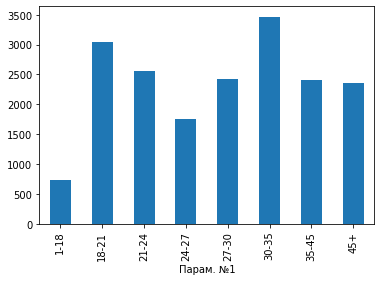

In [52]:
agess.plot.bar()
plt.show()

In [53]:
country = dfs[['Парам. №1','Значение']][dfs['Критерий_countries'] == 1]
country.head()

,Парам. №1,Значение
9,Россия,3
27,Россия,8
28,Украина,1
29,Беларусь,1
45,Россия,5


In [54]:
countryss = country.groupby(['Парам. №1'])['Значение'].sum()
countryss

Парам. №1
Австралия                       1
Австрия                         7
Азербайджан                    19
Аргентина                       1
Армения                         8
                               ..
Шри-Ланка                       1
Эстония                        28
Южная Корея                     3
Южно-Африканская Республика     1
Япония                          2
Name: Значение, Length: 70, dtype: int64

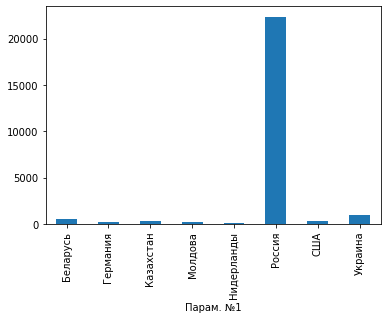

In [55]:
countryss[countryss > 100].plot.bar()
plt.show()

In [56]:
fb = dfs[['Дата','Парам. №1','Значение']][dfs['Критерий_feedback'] == 1] 
fb

,Дата,Парам. №1,Значение
49,13.03.2020,Нравится,2
70,12.03.2020,Нравится,1
117,10.03.2020,Нравится,2
386,26.02.2020,Нравится,1
387,26.02.2020,Рассказали друзьям,1
...,...,...,...
42342,03.08.2016,Нравится,3
42394,02.08.2016,Нравится,1
42395,02.08.2016,Комментарии,1
42449,01.08.2016,Нравится,4


In [57]:
fb['Дата'] = fb.apply(convert, axis=1)
fb.head()

,Дата,Парам. №1,Значение
49,2020-03-13,Нравится,2
70,2020-03-12,Нравится,1
117,2020-03-10,Нравится,2
386,2020-02-26,Нравится,1
387,2020-02-26,Рассказали друзьям,1


In [58]:
fb['Дата'] = fb['Дата'].dt.strftime('%Y-%m')
fb.head()

,Дата,Парам. №1,Значение
49,2020-03,Нравится,2
70,2020-03,Нравится,1
117,2020-03,Нравится,2
386,2020-02,Нравится,1
387,2020-02,Рассказали друзьям,1


In [59]:
fb['Парам. №1'].value_counts()

Нравится              683
Рассказали друзьям    291
Комментарии            91
Упоминания              1
Name: Парам. №1, dtype: int64

In [60]:
likes = fb[fb['Парам. №1'] == 'Нравится']
fb.head()

,Дата,Парам. №1,Значение
49,2020-03,Нравится,2
70,2020-03,Нравится,1
117,2020-03,Нравится,2
386,2020-02,Нравится,1
387,2020-02,Рассказали друзьям,1


In [61]:
likesss = likes.groupby(['Дата'])['Значение'].sum()

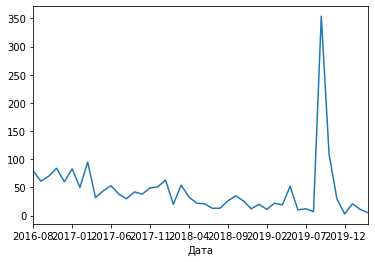

In [62]:
likesss.plot()
plt.show()

In [64]:
repost = fb[fb['Парам. №1'] == 'Рассказали друзьям']
repost.head()

,Дата,Парам. №1,Значение
387,2020-02,Рассказали друзьям,1
750,2020-02,Рассказали друзьям,1
1270,2020-01,Рассказали друзьям,1
1410,2020-01,Рассказали друзьям,3
1559,2020-01,Рассказали друзьям,1


In [66]:
repostss = repost.groupby(['Дата'])['Значение'].sum()

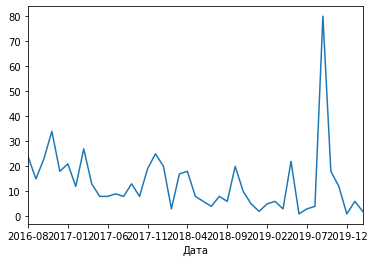

In [67]:
repostss.plot()
plt.show()

In [70]:
сomments = fb[fb['Парам. №1'] == 'Комментарии']
сomments.head()

,Дата,Парам. №1,Значение
681,2020-02,Комментарии,1
989,2020-02,Комментарии,1
1015,2020-01,Комментарии,2
1064,2020-01,Комментарии,6
1246,2020-01,Комментарии,1


In [ ]:
сommentsss = сomments.groupby(['Дата'])['Значение'].sum()

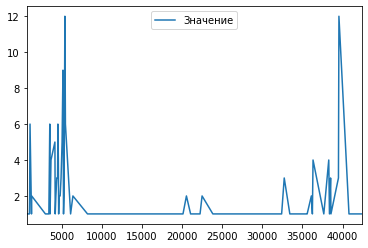

In [71]:
сomments.plot()
plt.show()

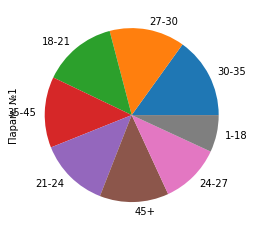

In [76]:
age['Парам. №1'].value_counts().plot.pie()
plt.show()

**Ответ:** 